In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("Stress_Distribution_notebook.ipynb")

In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("Stress_Distribution_notebook.ipynb")

# CEE 175: Geotechnical and Geoenvironmental Engineering

> **Alex Frantzis** <br> Cool Student >:3, UC Berkeley

[![License](https://img.shields.io/badge/license-CC%20BY--NC--ND%204.0-blue)](https://creativecommons.org/licenses/by-nc-nd/4.0/)
***

In [2]:
# Please run this cell, and do not modify the contents

import hashlib
def get_hash(num):
    """Helper function for assessing correctness"""
    return hashlib.md5(str(num).encode()).hexdigest()
    
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Vertical Stress Distribution in Soil

## Introduction

In geotechnical engineering, understanding how stresses from surface loads travel through soil is essential for evaluating settlement, bearing capacity, and the potential for soil failure. Because soil is a complex, nonlinear, and often heterogeneous material, engineers rely on several analytical methods, each with its own assumptions to estimate how vertical stress spreads with depth.

In this assignment, you will implement **two classical stress distribution methods** in code:

1. **2:1 Method (Approximate/Empirical)**
2. **Boussinesq Method (Elastic Half Space Theory)**

You will apply each method to the same loading scenario and soil profile, compute stress at various depths, and compare the outputs and behavior of each method. By the end, you should understand **how and why different methods give different stress predictions**, and which method is most appropriate in different engineering contexts.


## Question 1: 2:1 Method

The **2:1 method** is a simple approximate technique often used for quick estimates.

It assumes that the vertical stress spreads out in a **pyramid shape**, with the loaded area expanding at a slope of **2 vertical : 1 horizontal**.

- Stress diminishes with depth as the load spreads over a larger area.
- It ignores soil stiffness, layering, and elasticity.
- Best used as a **fast check** or when limited data is available.

---
### The loaded area expands linearly with depth:

$$
B_{z} = B + z    
$$
$$
L_{z} = L + z
$$

### Area at depth z
$$
A(z) = B_z * L_z
$$
### Vertical stress at depth z

Assuming the entire load Q spreads uniformly over A(z):
$$
\sigma_{z}(z) = Q / A(z)
$$
### Units:
- Q in kN  
- A(z) in m²  
- sigma_z in kPa (because kN/m² = kPa)
<center><img src="resources/2to1Diagram.png" width='650'/></center>
---
Image from Holtz, Kovacs, and Sheahan

Write a function named `stress_2to1()` that calculates the stress at specified depth using the 2:1 method. This function has the following input argument:
* `load`, which is the applied load normal to the surface. (kPa)
* `width`, which is the width of the surface where the load is applied. (m)
* `length`, which is the length of the surface where the load is applied. (m)
* `depth`, which is the depth below the surface where the stress is to be found. (m)

and the following output arguments.
* `stress`, vertical stress at depth z (kPa)
---
We are assuming that the stress is taken within the range in which 2:1 is valid

In [18]:
import numpy as np

def stress_2to1(load, width, length, depth):
    Bz = width + depth # SOLUTION
    Lz = length + depth # SOLUTION

    # Area at depth z
    Az = Bz * Lz

    # Stress = load / area
    sigma_z = load / Az

    return sigma_z


In [19]:
# TEST YOUR FUNCTION HERE
depth = 3 # SOLUTION
q1 = stress_2to1(1200, 3,4, depth) # SOLUTION

# print result
print(f'Stress at depth {depth} = {q1}')

Stress at depth 3 = 28.571428571428573


In [ ]:
grader.check("q1")

## Question 2: Boussinesq Method

The **Boussinesq solution** comes from elasticity theory for a *homogeneous, isotropic, elastic half-space*.  
It gives an exact theoretical solution for stress beneath a point load or a uniformly loaded area.

### Key ideas:
- Stress decays with depth based on the geometry and elastic behavior.  
- Typically gives **higher stresses** than the 2:1 method at shallow depths.  
- More accurate when the soil behaves close to elastic and uniform.


---
If one was made to hand ca
## Boussinesq Point Load Equation

For a point load dQ located a horizontal distance r away from the point where stress is evaluated:

Vertical stress contribution from that element:
$$
    dσ_z = (3 * dQ / (2π)) * (z^3 / (r^2 + z^2)^{(5/2)})
$$
Where:
- z = depth  
- r = sqrt(x² + y²), the radial distance from element dA  
- dQ = q * dA  
- q = Q / (B * L), (for uniform pressure)  

---

## Numerical Integration Concept

1. **Divide the footing area into a grid:**

       x ∈ [−B/2, B/2],      y ∈ [−L/2, L/2]

2. **Compute the area of each small element:**

       dA = dx * dy

3. **For each element:**
   - Compute the distance r  
   - Compute point stress dσz from the formula above  
   - Add it to the cumulative total

4. **The numerical sum approximates the exact vertical stress.**


---
Write a function named `stress_boussinesq()` that calculates the stress at specified depth using the boussinesq method. This function has the following input argument:
* `load`, which is the applied load normal to the surface. (kPa)
* `width`, which is the width of the surface where the load is applied. (m)
* `length`, which is the length of the surface where the load is applied. (m)
* `depth`, which is the depth below the surface where the stress is to be found. (m)
* `nx`, which is the number of grid samples to take in the x direction.
* `nx`, which is the number of grid samples to take in the y direction.
* `xpos`, which is the position where stress is measured in the x direction.
* `ypos`, which is the position where stress is measured in the y direction.

and the following output arguments.
* `stress`, vertical stress at depth z (kPa)
---
We have assumed a square shaped load to simplify the procedure, but the process and concept is extendable to any arbitrary shape and stress distribution.

In [23]:
import numpy as np

def stress_boussinesq(load, width, length, depth, nx=400, ny=400, xpos = 0, ypos = 0):
    # Uniform pressure q (kPa)
    q = load / (width * length) # SOLUTION

    # Discretize the area
    x = np.linspace(-width/2, width/2, nx)
    y = np.linspace(-length/2, length/2, ny) # SOLUTION
    dx = x[1] - x[0] # SOLUTION
    dy = y[1] - y[0] # SOLUTION

    X, Y = np.meshgrid(x, y)

    # Distance r from each element to the point below the center
    r = np.sqrt((X- xpos)**2 + (Y- ypos)**2)

    # Boussinesq point stress
    dA = dx * dy # SOLUTION
    dQ = q * dA # SOLUTION

    dSigma = (3 * dQ / (2 * np.pi)) * (depth**3) / (r**2 + depth**2)**(5/2) # SOLUTION

    stress = np.sum(dSigma)

    return stress


In [24]:
# TEST YOUR FUNCTION HERE
depth = 20# SOLUTION
q2 = stress_boussinesq(20000,10,10,depth, 600, 600, 5, 5) # SOLUTION

# print result
print(f'Stress at depth {depth} = {q2}')

Stress at depth 20 = 16.858356185578014


In [ ]:
grader.check("q2")

## Question 3: Comparison of Vertical Stress Beneath a Square Footing

In this section, you will compare the vertical stress beneath the center of a square footing
using:

- **2:1 Load Distribution Method**
- **Boussinesq Elastic Solution**

The footing size is increased progressively while keeping:
- Total load constant
- Evaluation depth constant

You will plot the resulting stresses as a function of footing width to highlight
the differences between the two methods and observe their limiting behavior.

---

### Instructions

1. Use the previously defined functions:
   - `stress_2to1()`
   - `stress_boussinesq()`

2. Define square side lengths

3. Compute:
   - 2to1_stress (Stress at depth of 10m below the center of the square footing using 2to1 method)
   - bossinesque_stress (Stress at depth of 10m below the center of the square footing using bossinesque method)


   for the range of side lengths (0m to 50m size square footing).

4. Plot **2to1_stress** and **bossinesque_stress** on the same graph.

---

### Example Plot Layout
<center><img src="resources/example_Graph.png" width='650'/></center>

- **x-axis:** footing side length (m) — increasing **rightward**
- **y-axis:** stress kPa

Use different line styles or colors to distinguish:<br>
— Total Stress  
— Pore Water Pressure  
— Effective Stress  

Make sure to include:
- A **legend** identifying each curve  
- **Axis labels** with units  
--- 
### The parameters are the following 
```PYTHON
load =  1000 (kPa)
depth = 10 (m)
side lengths: range from 0 to 50 (spacing of 1 between each sample)
```



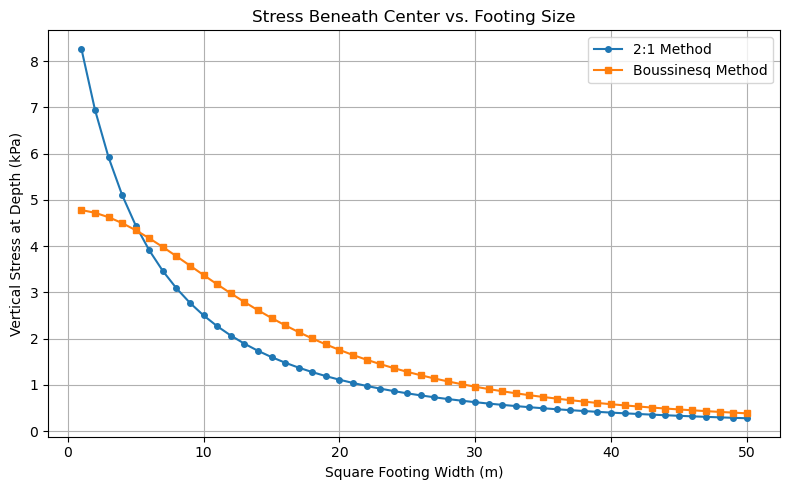

In [28]:
# Don't change function name. It must be "createFigure1" for testing purposes. Make sure the function returns the figure.
def createFigure1():
    # --- Parameters ---
    load = 1000        # SOLTION
    depth = 10        # SOLTION
    side_lengths = np.linspace(1, 50, 50)  # side lengths of square footing

    stresses_2to1 = []
    stresses_boussinesque = []

    # --- Compute stresses ---
    for len in side_lengths:
        # append stresses to list
        stresses_2to1.append(stress_2to1(load, len, len, depth)) # SOLTION
        stresses_boussinesque.append(stress_boussinesq(load, len, len, depth)) # SOLUTION

    # --- Plot ---
    fig_1 = plt.figure(figsize=(8, 5))
    plt.plot(side_lengths, stresses_2to1, 'o-', label='2:1 Method', markersize = 4) # SOLUTION
    plt.plot(side_lengths, stresses_boussinesque, 's-', label='Boussinesq Method', markersize = 4) # SOLUTION

    plt.xlabel('Square Footing Width (m)') # SOLUTION
    plt.ylabel('Vertical Stress at Depth (kPa)') # SOLUTION
    plt.title('Stress Beneath Center vs. Footing Size') # SOLUTION
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    return fig_1

fig_1 = createFigure1()

In [ ]:
grader.check("q3")

## Further Comparison Example

For your viewing, here is a comparison of the two methods with a constant stress instead of constant load. The stress is 1000kPA and the total load increases proportionally to the increase in area as the square footing gets larger and larger. Do the graphs tell you anything about possible differences in the results produced by the methods?

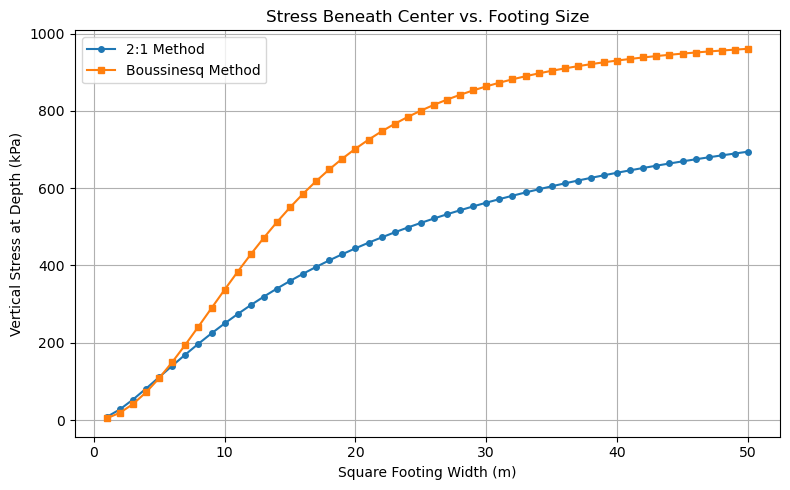

In [17]:
def createFigure2():
    # --- Parameters ---
    stress = 1000        # SOLTION
    depth = 10        # SOLTION
    side_lengths = np.linspace(1, 50, 50)  # side lengths of square footing

    stresses_2to1 = []
    stresses_boussinesque = []

    # --- Compute stresses ---
    for len in side_lengths:
        # append stresses to list
        stresses_2to1.append(stress_2to1(stress * (len * len), len, len, depth)) # SOLTION
        stresses_boussinesque.append(stress_boussinesq(stress * (len * len), len, len, depth)) # SOLUTION

    # --- Plot ---
    fig_1 = plt.figure(figsize=(8, 5))
    plt.plot(side_lengths, stresses_2to1, 'o-', label='2:1 Method', markersize = 4) # SOLUTION
    plt.plot(side_lengths, stresses_boussinesque, 's-', label='Boussinesq Method', markersize = 4) # SOLUTION

    plt.xlabel('Square Footing Width (m)') # SOLUTION
    plt.ylabel('Vertical Stress at Depth (kPa)') # SOLUTION
    plt.title('Stress Beneath Center vs. Footing Size') # SOLUTION
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    return fig_1

fig_2 = createFigure2()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)